## **Рабочая тетрадь № 4**

Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.

Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.

Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.

Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

# **Линейная регрессия**

Линейная регрессия Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть 𝑓 (𝑥) = 𝑏 + 𝑚 * 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

# **Функция потерь - метод наименьших квадратов**

Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением 𝑦(х) и его фактическим значением.

Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

# **Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек.

Самыми распостраненными выступают:
- numpy - numpy.linalg.lstsq
- scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

**1.1.1. Пример**

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


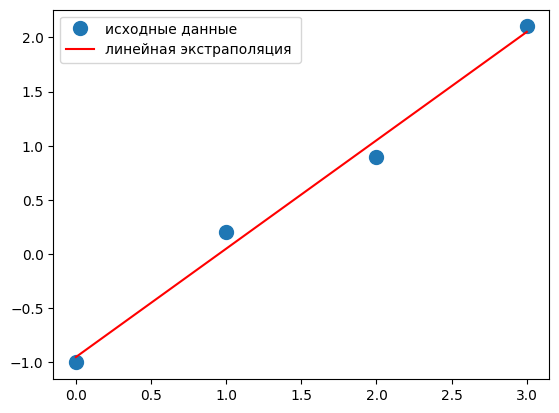

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(A)
print(m, c)

plt.plot(x, y, 'o', label='исходные данные', markersize=10)

plt.plot(x, m * x + c, 'r', label="линейная экстраполяция ")
plt.legend()
plt.show()

**1.1.2. Пример**

Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома a,b,c по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

[-4.97947614 -4.1462072  -2.73788325 -2.26926108 -1.30069266 -0.36955501
  1.26747201  1.52700959  2.51570477  4.14195886  4.56802964]
[24.79752397 16.14960915  8.83516114  3.79469264  0.93216495 -0.15435071
  1.47035668  4.4691332   8.7148514  15.61144186 24.63917701]


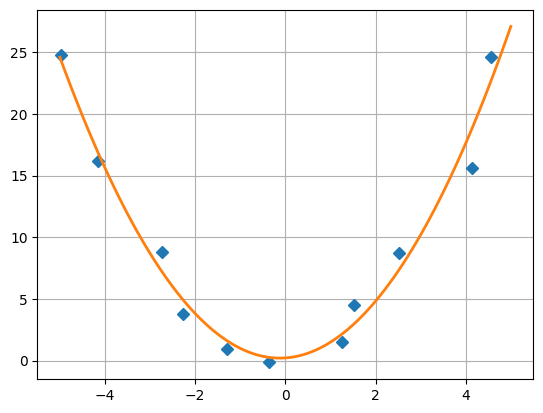

In [ ]:
from numpy.random import *

delta = 1.0

x = np.linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)

x += delta * (rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = np.fromfile('x_data.txt', float, sep='\n')
y = np.fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = np.vstack((x ** 2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)

plt.grid()
plt.savefig("парабола.png")

**1.1.3. Пример**

По данным предыдущего примера постройте экстраполяционного полинома третьего порядка.

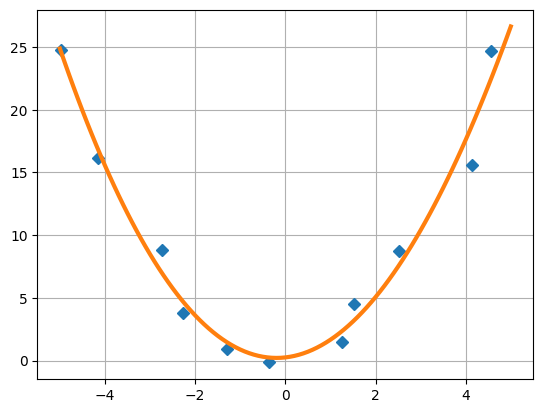

In [ ]:
m = np.vstack((x ** 3, x ** 2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

**Задание**

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

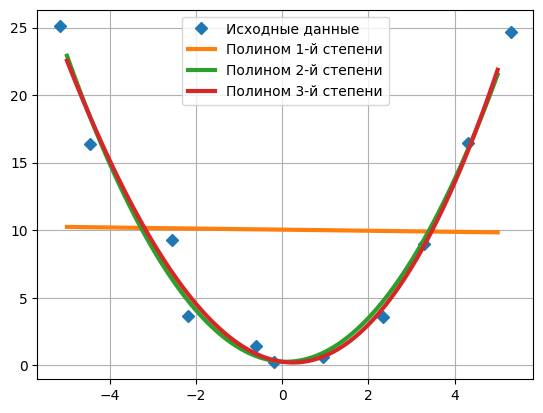

In [ ]:
delta = 1.0

x = np.linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)

x += delta * (rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = np.fromfile('x_data.txt', float, sep='\n')
y = np.fromfile('y_data.txt', float, sep='\n')

x_prec = np.linspace(-5, 5, 101)

plt.plot(x, y, 'D', label='Исходные данные')

for degree in range(1, 4):
    # Создание матрицы m с нужными степенями x
    m = np.vstack([x ** i for i in range(degree, -1, -1)]).T

    s = np.linalg.lstsq(m, y, rcond=None)[0]

    y_approx = np.sum([s[i] * x_prec ** (degree - i) for i in range(degree + 1)], axis=0)
    plt.plot(x_prec, y_approx, '-', lw=3, label=f'Полином {degree}-й степени')

plt.grid()
plt.legend()
plt.savefig("аппроксимация.png")
plt.show()

**1.1.4. Пример**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида $f(x, b) = b_0 + b_1 e^{(-b_2 x^2)}$

1.763813567676703e-05
0.00915709455750694


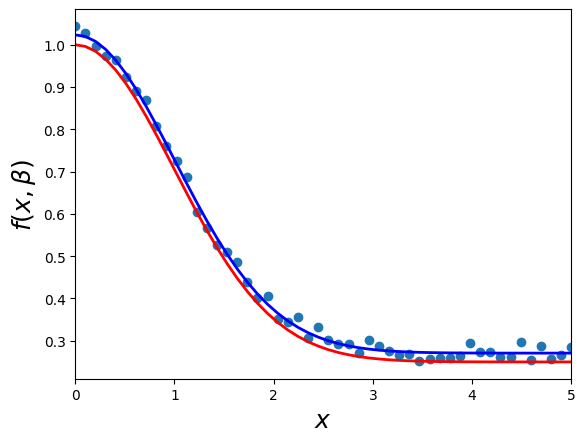

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.04459083 1.02853678 0.99797323 0.97410212 0.96369267 0.9233247
 0.89147807 0.87055112 0.80752927 0.76083842 0.72507514 0.68760242
 0.60513607 0.56642281 0.5271101  0.51077681 0.48536103 0.43970039
 0.4020058  0.4067331  0.35154247 0.34511323 0.35623965 0.3072362
 0.33223981 0.30204527 0.29182048 0.29281321 0.27112729 0.30299878
 0.28670621 0.27579497 0.26734855 0.26809922 0.25225638 0.25633056
 0.25932129 0.26002491 0.26395787 0.2959

In [ ]:
import scipy as sp

beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * (x ** 2))


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)

**1.1.5. Пример**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

1) $f(x, b) = b_0 + b_1 x$

2) $f(x, b) = b_0 + b_1 x + b_2 x^2$

3) $f(x, b) = b_0 + b_1 ln(x)$


4) $f(x, b) = b_0 x^{b_1}$


---

**№1**

[0.27676326 0.7477354 ]
0.012952681526069251


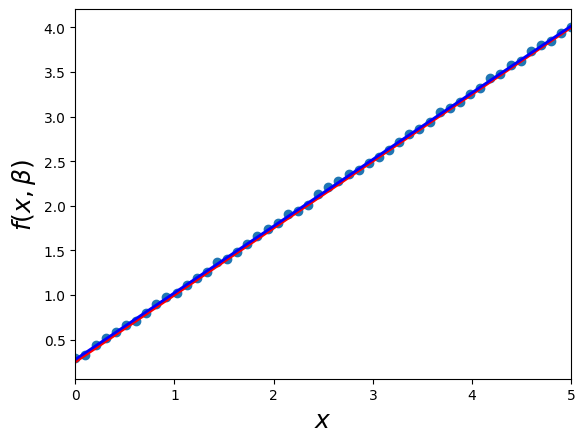

In [ ]:
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---

**№2**

[0.27356219 0.74856015 0.50036106]
0.010027838559787582


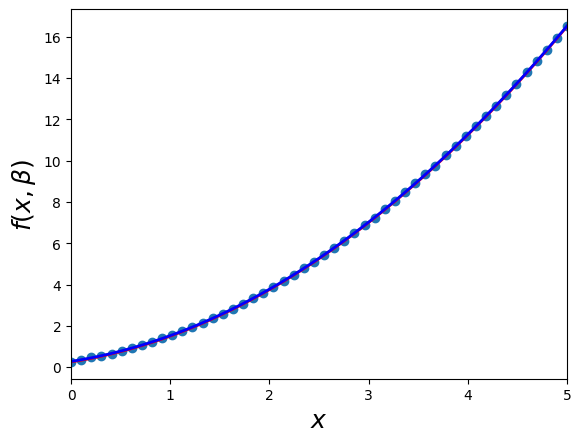

In [ ]:
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---

**№3**


[1.01896692 2.0020553 ]
0.00955776280766617


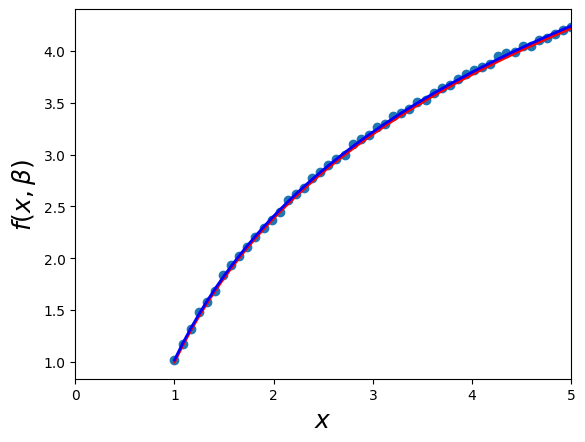

In [ ]:
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---

**№4**

[1.00828245 1.99536397]
0.01183417235958147


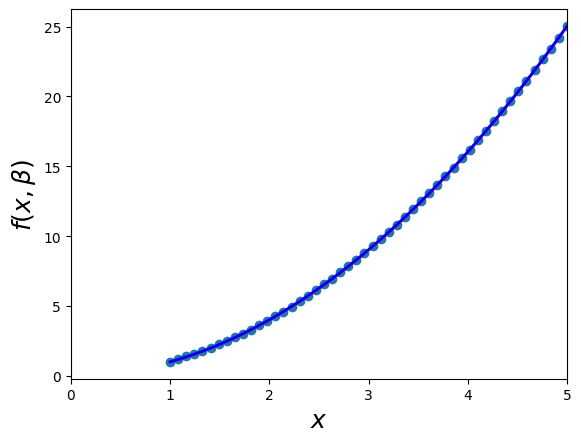

In [ ]:
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---

**Задание**

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

---
**№1**

[0.52615517 0.99967813]
0.01117696907011694


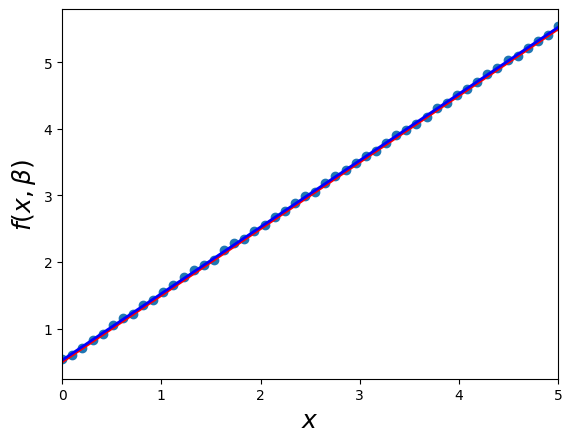

In [2]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy.optimize import curve_fit

beta = (0.5, 1)


def f(x, b0, b1):
    return b0 + b1 * x


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---
**№2**

[0.52815401 0.74300189 1.0016175 ]
0.011165401576024098


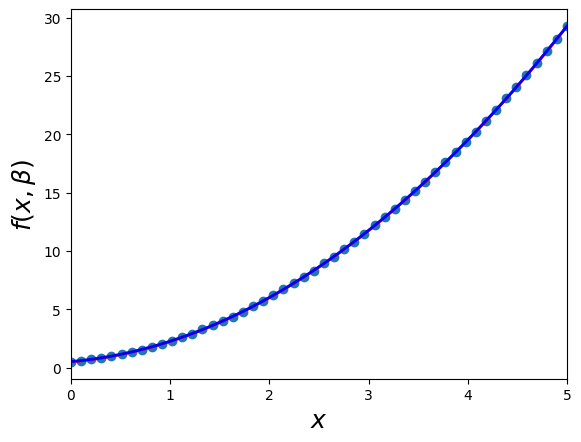

In [3]:
beta = (0.5, 0.75, 1)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x


xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---
**№3**

[2.03952346 3.99056755]
0.013196639134510585


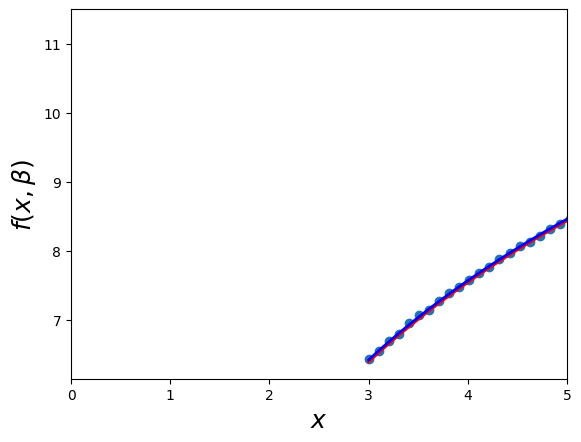

In [4]:
beta = (2, 4)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(3, 10, 70)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---
**№4**

[2.00396992 2.99891056]
0.03670420314035487


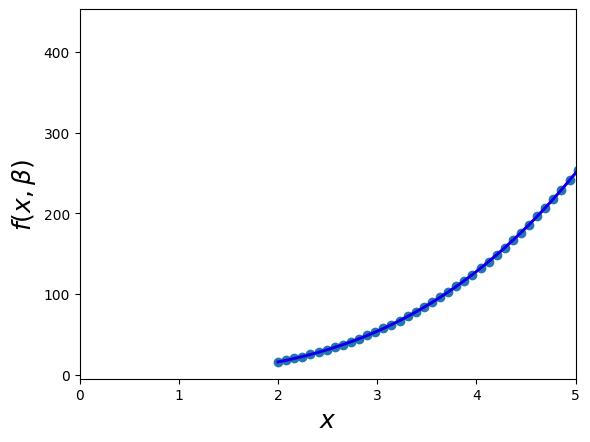

In [5]:
beta = (2, 3)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(2, 6, 50)

y = f(xdata, *beta)

ydata = y + 0.09 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)

ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

---

# **Задачи регрессии**

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

**1.2.1. Пример**

Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.787500  53.700000
std         1.507165  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.625000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


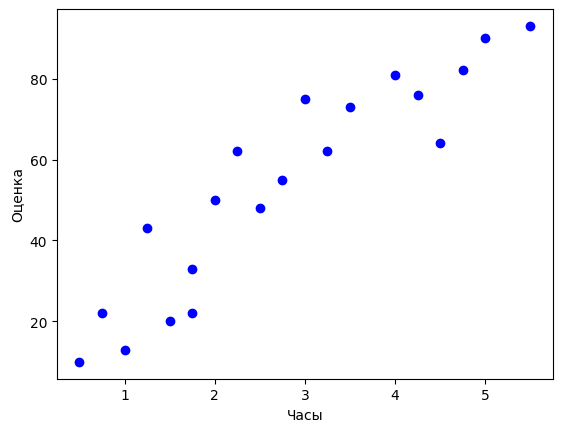

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
11.564766839378237
[15.64766839]


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

my_dict = {
    'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25,
                      4.50, 4.75, 5.00, 5.50],
    "Оценка": [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)

print(dataset.head())

print(dataset.shape)
print(dataset.describe())

plt.scatter(dataset["Учебное время"], dataset['Оценка'], color='b', label="данные экзамена")

plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

regressorr = LinearRegression()

regressorr.fit(X_train, y_train)
print(regressorr.intercept_)
print(regressorr.coef_)

Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку.

Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

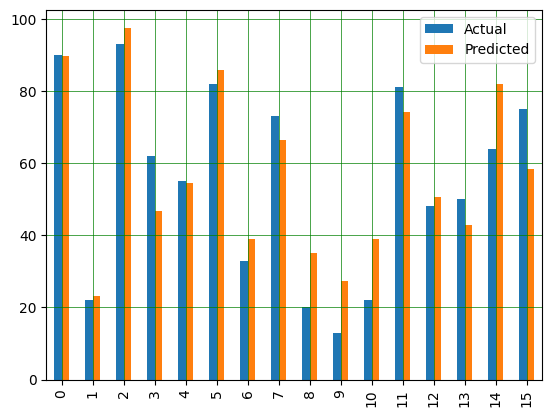

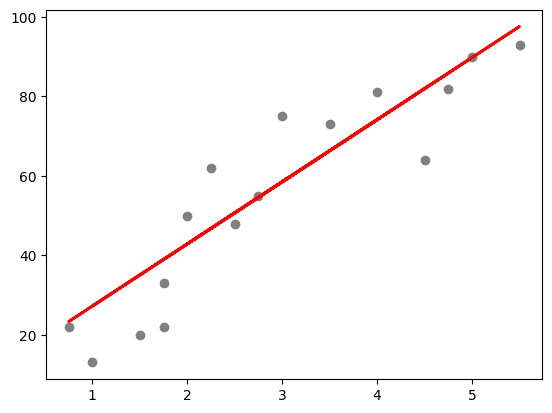

    Actual  Predicted
0       90  89.803109
1       22  23.300518
2       93  97.626943
3       62  46.772021
4       55  54.595855
5       82  85.891192
6       33  38.948187
7       73  66.331606
8       20  35.036269
9       13  27.212435
10      22  38.948187
11      81  74.155440
12      48  50.683938
13      50  42.860104
14      64  81.979275
15      75  58.507772


In [10]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print(df)

**Задание**

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).

Найдите коэффициенты линии регрессии. Постройте прогноз.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)

print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


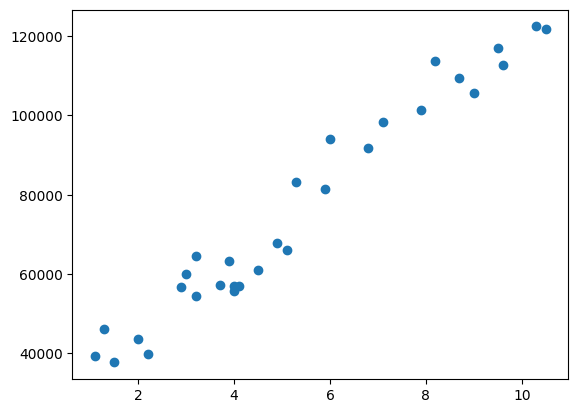

In [20]:
print(data.shape)
print(data.describe())

plt.scatter(data['YearsExperience'], data['Salary'], label="Salary data")
plt.show()

In [14]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print(x, y, sep="\n")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Линейная регрессия: Y = {:.5} + {:.5}X'.format(regressor.intercept_, regressor.coef_[0]))

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
Линейная регрессия: Y = 2.678e+04 + 9312.6X


In [18]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


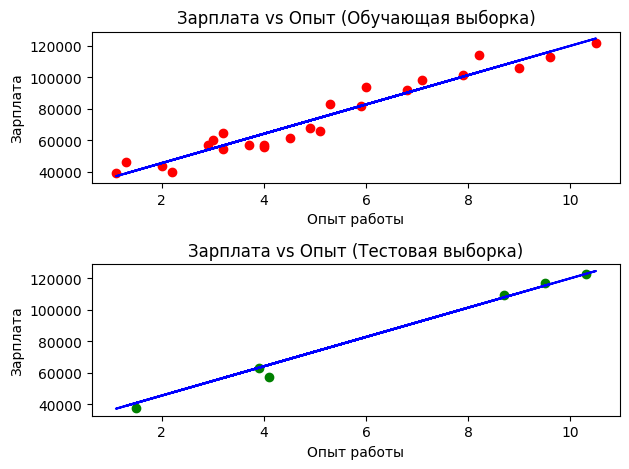

In [21]:
fig, axs = plt.subplots(2)

# Визуализируем результаты обучения
axs[0].scatter(x_train, y_train, color='red')
axs[0].plot(x_train, regressor.predict(x_train), color='blue')
axs[0].set_title('Зарплата vs Опыт (Обучающая выборка)')
axs[0].set_xlabel('Опыт работы')
axs[0].set_ylabel('Зарплата')

# Визуализируем результаты тестирования
axs[1].scatter(x_test, y_test, color='green')
axs[1].plot(x_train, regressor.predict(x_train), color='blue')
axs[1].set_title('Зарплата vs Опыт (Тестовая выборка)')
axs[1].set_xlabel('Опыт работы')
axs[1].set_ylabel('Зарплата')

plt.tight_layout()
plt.show()

# **Множественная регрессия**

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

**1.3.1. Пример**

Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq

In [23]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 4, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]

print(linreg)


[ 0.13099364  0.26625828 -0.02194925  1.50231509]


**1.3.2. Пример**

Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn

In [26]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 4, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)

new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)

df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]

dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

print(dataset.head())

print(dataset.shape)
dataset.describe()

X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({"Actual": y_test, 'Predicted': y_pred})
print(df)

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
    Coefficient
x1     1.894737
x2    -4.052632
x3    -2.947368
    Actual  Predicted
11       5 -13.736842
10       4 -14.315789
21       3  -8.315789
14       4   3.157895
20       1  27.473684
1        2  25.789474
13       5  -0.052632
22       1  -6.473684
16       6   8.263158
8        5   5.157895
6        5  -9.421053
17       0  -2.789474
4        3   4.578947
2        3  22.578947
5        4  -4.315789
18       6  -9.789474
9        5  -9.947368
7        3  -8.842105
19       3  29.315789
Mean Squared Error: 218.14929289983965


**Задание**

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии.

Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


In [36]:
# Загрузим данные о потреблении бензина
data_url1 = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
dataset1 = pd.read_csv(data_url1)

X1 = dataset1[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y1 = dataset1['Petrol_Consumption']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

coeff_df1 = pd.DataFrame(regressor1.coef_, X1.columns, columns=['Coefficient'])
print(coeff_df1)

y1_pred = regressor1.predict(X1_test)
print('\nMean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

                              Coefficient
Petrol_tax                     -40.016660
Average_income                  -0.065413
Paved_Highways                  -0.004741
Population_Driver_licence(%)  1341.862121

Mean Absolute Error: 56.822247478964734
Mean Squared Error: 4666.344787588369
Root Mean Squared Error: 68.31064915215174


In [38]:
# Загрузим данные о качестве вина
data_url2 = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
dataset2 = pd.read_csv(data_url2)

X2 = dataset2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
               'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y2 = dataset2['quality']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)

coeff_df2 = pd.DataFrame(regressor2.coef_, X2.columns, columns=['Coefficient'])
print(coeff_df2)

y2_pred = regressor2.predict(X2_test)
print('\nMean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

                      Coefficient
fixed acidity            0.041284
volatile acidity        -1.149528
citric acid             -0.177927
residual sugar           0.027870
chlorides               -1.873407
free sulfur dioxide      0.002684
total sulfur dioxide    -0.002777
density                -31.516666
pH                      -0.254486
sulphates                0.924040
alcohol                  0.267797

Mean Absolute Error: 0.46963309286611193
Mean Squared Error: 0.3844711978201248
Root Mean Squared Error: 0.6200574149384271


**Доп. задание(7 вариант)**

Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО.

Коэффициенты полинома первой степени: [0.42857143 3.19047619]
СКО для полинома первой степени: 1.455149585939644
Коэффициенты полинома второй степени: [-2.23214286  7.125      -1.57142857]
СКО для полинома второй степени: 1.438004569831801


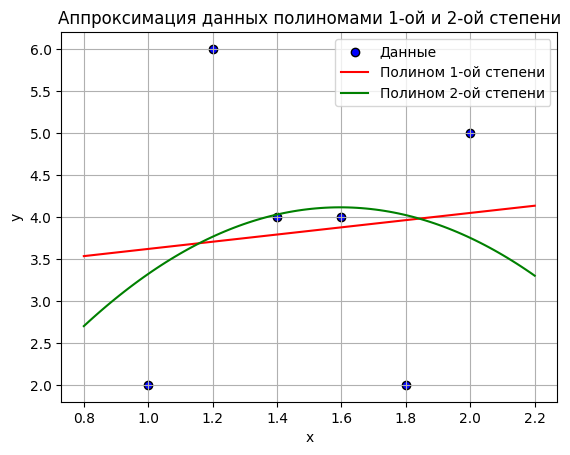

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 4.0, 2.0, 5.0])

# Полином первой степени (линейная регрессия)
coefficients1 = np.polyfit(x, y, 1)
poly1 = np.poly1d(coefficients1)

# Полином второй степени
coefficients2 = np.polyfit(x, y, 2)
poly2 = np.poly1d(coefficients2)

# Вычисление СКО для полиномов первой и второй степени
rmse1 = np.sqrt(np.mean((y - poly1(x)) ** 2))
rmse2 = np.sqrt(np.mean((y - poly2(x)) ** 2))

print(f"Коэффициенты полинома первой степени: {coefficients1}")
print(f"СКО для полинома первой степени: {rmse1}")
print(f"Коэффициенты полинома второй степени: {coefficients2}")
print(f"СКО для полинома второй степени: {rmse2}")

xp = np.linspace(0.8, 2.2, 100)
yp1 = poly1(xp)
yp2 = poly2(xp)

plt.scatter(x, y, facecolor='blue', edgecolor='k', label="Данные")
plt.plot(xp, yp1, 'r-', label="Полином 1-ой степени")
plt.plot(xp, yp2, 'g-', label="Полином 2-ой степени")
plt.legend()
plt.title("Аппроксимация данных полиномами 1-ой и 2-ой степени")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Для решения этой задачи с использованием функций numpy.vstack и numpy.linalg.lstsq необходимо сначала собрать матрицу дизайна с помощью numpy.vstack, а затем решить задачу наименьших квадратов с помощью numpy.linalg.lstsq.

Для линейной регрессии (полином первой степени) матрица дизайна будет состоять из двух строк: одна строка полна единиц (свободный член), а вторая строка - это данные.

Для полинома второй степени матрица дизайна будет состоять из трех строк: одна строка полна единиц (свободный член), вторая строка - это данные, и третья строка - это квадраты данных.

Коэффициенты полинома первой степени: [0.42857143 3.19047619]
СКО для полинома первой степени: 1.4551495859396444
Коэффициенты полинома второй степени: [-2.23214286  7.125      -1.57142857]
СКО для полинома второй степени: 1.4380045698317998


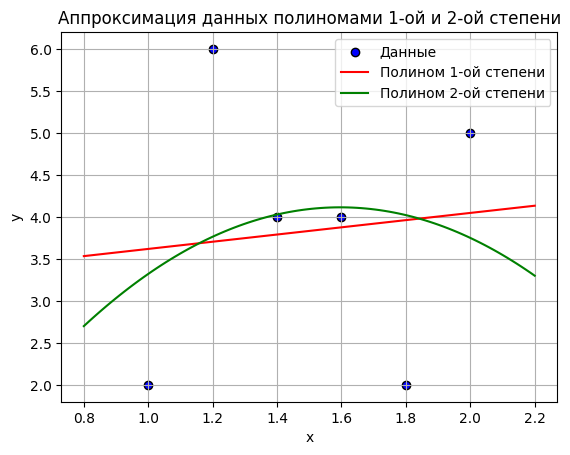

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 4.0, 2.0, 5.0])

A1 = np.vstack([x, np.ones(len(x))]).T
coefficients1, residuals1, _, _ = np.linalg.lstsq(A1, y, rcond=None)
rmse1 = np.sqrt(residuals1[0] / len(x))

A2 = np.vstack([x ** 2, x, np.ones(len(x))]).T
coefficients2, residuals2, _, _ = np.linalg.lstsq(A2, y, rcond=None)
rmse2 = np.sqrt(residuals2[0] / len(x))

print("Коэффициенты полинома первой степени:", coefficients1)
print("СКО для полинома первой степени:", rmse1)
print("Коэффициенты полинома второй степени:", coefficients2)
print("СКО для полинома второй степени:", rmse2)

xp = np.linspace(0.8, 2.2, 100)
yp1 = np.polyval(coefficients1, xp)
yp2 = np.polyval(coefficients2, xp)

plt.scatter(x, y, facecolor='blue', edgecolor='k', label="Данные")
plt.plot(xp, yp1, 'r-', label="Полином 1-ой степени")
plt.plot(xp, yp2, 'g-', label="Полином 2-ой степени")
plt.legend()
plt.title("Аппроксимация данных полиномами 1-ой и 2-ой степени")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()